In [4]:
import os

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
REPORT_PATH = "./report"

# random_tests = ["1711446488", "1711447141", "1711447795", "1711448448", "1711449102"]
carbon_intensity_tests = ["1713478810"]

In [8]:
carbon_intensity_dfs = dict()

for i, folder in enumerate(carbon_intensity_tests):
    folder_path = os.path.join(REPORT_PATH, folder)
    file_path = os.path.join(folder_path, "carbon-report-200rps-50msz.csv")
    df = pd.read_csv(file_path)
    carbon_intensity_dfs[i] = df

In [9]:
def plot_carbon_report(
        creps: dict[int, pd.DataFrame], 
        y_series: str,
        y_label: str = "Unit",
        title: str = "Carbon Report",
):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    x_data = list(creps.values())[0]['timestamp']
    x_data = x_data - x_data.min()
    
    for rps, df in creps.items():
        ax.plot(x_data, df[y_series], linewidth=1, label=f"{rps}")
    
    ax.set_title(title)
    ax.set_xlabel("Seconds since start")
    ax.set_ylabel(y_label)
    
    ax.legend(title="RPS")
    
    plt.show()

In [10]:
Y_SERIES_LABELS = {
    "energy_use_watts": "Joules",
    "carbon_intensity_gco2_kwh": "gCO2/kWH",
    "carbon_emission_gco2": "gCO2",
    "latency_ms": "millisecond",
}

In [11]:
Y_SERIES_TITLES = {
    "energy_use_watts": "Energy use",
    "carbon_intensity_gco2_kwh": "Carbon intensity",
    "carbon_emission_gco2": "Carbon emission",
    "latency_ms": "Latency",
}

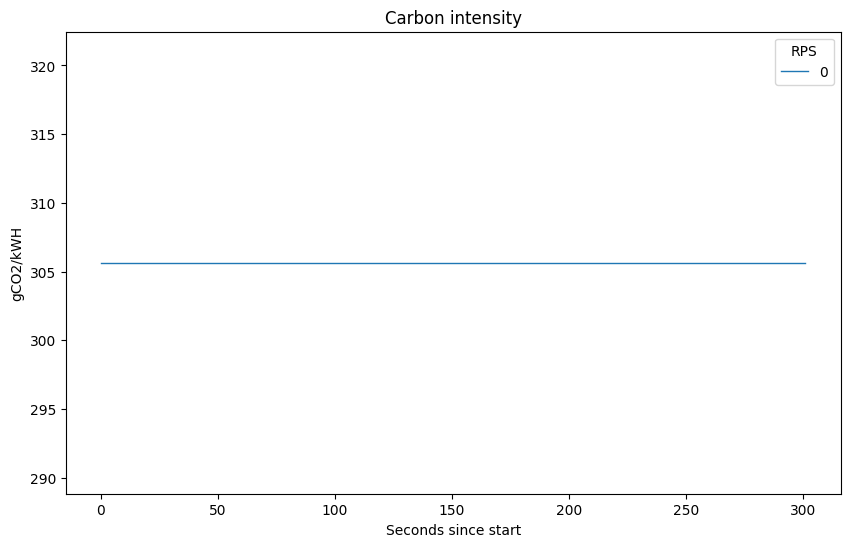

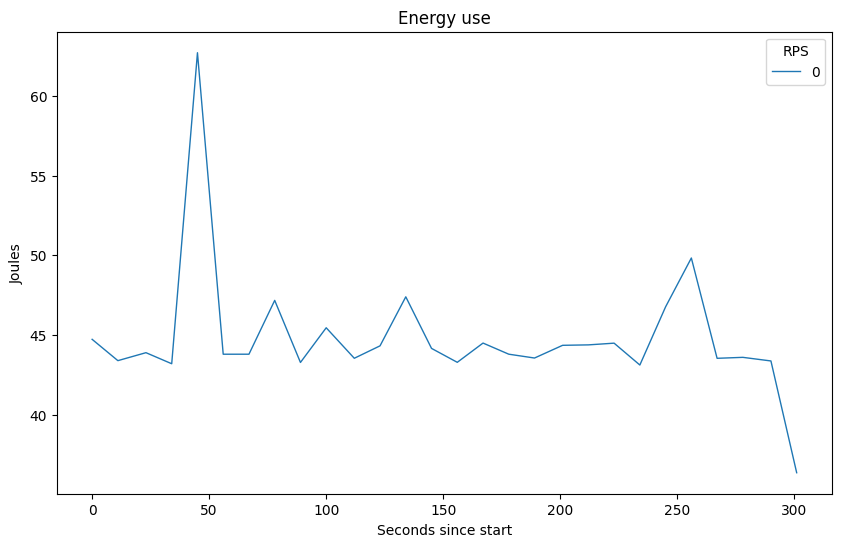

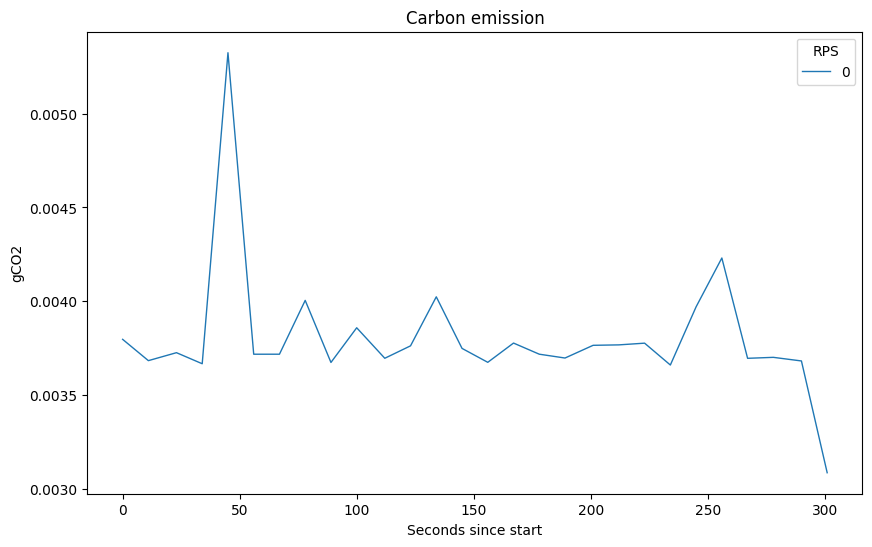

In [12]:
plot_carbon_report(carbon_intensity_dfs, y_series="carbon_intensity_gco2_kwh", y_label=Y_SERIES_LABELS["carbon_intensity_gco2_kwh"], title=Y_SERIES_TITLES["carbon_intensity_gco2_kwh"])
plot_carbon_report(carbon_intensity_dfs, y_series="energy_use_watts", y_label=Y_SERIES_LABELS["energy_use_watts"], title=Y_SERIES_TITLES["energy_use_watts"])
plot_carbon_report(carbon_intensity_dfs, y_series="carbon_emission_gco2", y_label=Y_SERIES_LABELS["carbon_emission_gco2"], title=Y_SERIES_TITLES["carbon_emission_gco2"])